# An Example Soft-Max Classifier

In this notebook we demonstrate how to design a classifier which divides a 2d region into three parts with non-linear boundaries.

Example from https://cs231n.github.io/neural-networks-case-study/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Data generation

The first part of the code generates some data points in the (x,y) plane that lie around spiral lines starting at the origin. Three lines of points are generated with three colours (or 'classes').

In [2]:
n_points = 100 # number of points per class / number of points around each spiral
D = 2 # dimensionality
n_colours = 3 # number of classes / number of colours
data_xy = np.zeros((n_points*n_colours,D)) # data matrix (each row = single example)
data_col = np.zeros(n_points*n_colours, dtype='uint8') # class labels
for j in range(n_colours):
    ix = range(n_points*j,n_points*(j+1))
    r = np.linspace(0.0,1,n_points) # radius
    t = np.linspace(j*4,(j+1)*4,n_points) + np.random.randn(n_points)*0.2 # theta
    data_xy[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    data_col[ix] = j

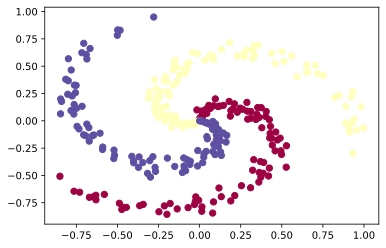

In [3]:
# lets visualize the data:
plt.scatter(data_xy[:, 0], data_xy[:, 1], c=data_col, s=40, cmap=plt.cm.Spectral)
plt.show()

# 2. Linear model

Here we try to train a linear model built from scores, $z(X)$,

  ${\rm z}_j = X_{i} W_{ij}+b_{j}$

where, $i=1,2$ (i.e. x,y coordinates), $j=1,n_{\rm colours}$. The probability of this score is given using the sigmoid function:

  $\sigma(z_j) = \frac{\exp(-z_j)}{\sum_k \exp(-z_k)}$
  
repeated indices are understood to be summed over. By definition,

  $\sum_j \sigma(z_j) = 1$
  
so $P(X) = \sigma(z(X))$ outputs $n_{\rm colours}$ values between 0 and 1 that sum to 1.

The final prediction of the model would be the most likely of the possible colours:

${\rm colour}_{\rm pred} = {\rm argmax}(z(X))$

which is a integer value between 1 and $n_{\rm colours}$

In [5]:
# initialize parameters randomly (W - weights, b - biases)
W = 0.01 * np.random.randn(D,n_colours)
b = np.zeros((1,n_colours))

Now we compute the output values (scores) of our model using the fact that

* input data, X, is 3*(n_points) by 2 matrix
* weights, W, form a 2 by 3 matrix

and so X.W is a 3*(n_points) by 3 matrix

In [6]:
print(np.shape(data_xy))
print(np.shape(W))

(300, 2)
(2, 3)


In [7]:
# compute class scores for a linear classifier
scores = np.dot(data_xy, W) + b

In [8]:
print(np.shape(scores))

(300, 3)


In [9]:
num_examples = data_xy.shape[0]
print("number of data points provided = ", num_examples)
# get unnormalized probabilities
exp_scores = np.exp(scores)
# normalize them for each example, list of \sigma(z_i) defined above
probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

number of data points provided =  300


We can now compute the -ve logarithm of the probability to use in the soft-max loss function

In [10]:
print(np.shape(probs))
probs[1]

(300, 3)


array([0.33331396, 0.33335888, 0.33332716])

In [11]:
correct_logprobs = -np.log(probs[range(num_examples),data_col])

In [12]:
# compute the loss: average cross-entropy loss and regularization
reg = 0.1

data_loss = np.sum(correct_logprobs)/num_examples
reg_loss = 0.5*reg*np.sum(W*W)
loss = data_loss + reg_loss
print("loss = ", loss)

loss =  1.0976549201551775


In [13]:
dscores = probs
dscores[range(num_examples),data_col] -= 1
dscores /= num_examples

In [14]:
print(dscores[1])

[-0.00222229  0.0011112   0.00111109]


In [15]:
dW = np.dot(data_xy.T, dscores)
db = np.sum(dscores, axis=0, keepdims=True)
dW += reg*W # don't forget the regularization gradient (data in this case has Gaussian noise)

In [16]:
# perform a parameter update
step_size = 0.1 # AKA learning rate
W += -step_size * dW
b += -step_size * db

Now we iterate these steps to train the model

In [17]:
# initialize parameters randomly
W = 0.01 * np.random.randn(D,n_colours)
b = np.zeros((1,n_colours))

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = data_xy.shape[0]
for i in range(200):

    # evaluate class scores, [N x n_colours]
    scores = np.dot(data_xy, W) + b

    # compute the class probabilities
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x n_colours]

    # compute the loss: average cross-entropy loss and regularization
    correct_logprobs = -np.log(probs[range(num_examples),data_col])
    data_loss = np.sum(correct_logprobs)/num_examples
    reg_loss = 0.5*reg*np.sum(W*W)
    loss = data_loss + reg_loss
    if i % 10 == 0:
        print("iteration %d: loss %f" % (i, loss))

    # compute the gradient on scores
    dscores = probs
    dscores[range(num_examples),data_col] -= 1
    dscores /= num_examples

    # backpropate the gradient to the parameters (W,b)
    dW = np.dot(data_xy.T, dscores)
    db = np.sum(dscores, axis=0, keepdims=True)

    dW += reg*W # regularization gradient

    # perform a parameter update
    W += -step_size * dW
    b += -step_size * db

iteration 0: loss 1.099738
iteration 10: loss 0.905092
iteration 20: loss 0.832953
iteration 30: loss 0.800182
iteration 40: loss 0.783094
iteration 50: loss 0.773332
iteration 60: loss 0.767392
iteration 70: loss 0.763609
iteration 80: loss 0.761117
iteration 90: loss 0.759431
iteration 100: loss 0.758267
iteration 110: loss 0.757449
iteration 120: loss 0.756868
iteration 130: loss 0.756450
iteration 140: loss 0.756147
iteration 150: loss 0.755925
iteration 160: loss 0.755761
iteration 170: loss 0.755641
iteration 180: loss 0.755551
iteration 190: loss 0.755484


In [19]:
# evaluate training set accuracy
scores = np.dot(data_xy, W) + b
predicted_col = np.argmax(scores, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_col == data_col)))

training accuracy: 0.52


# Exercise 1 #

Make a plot of the prediction for the network for a grid in x and y and overset the orginal data set to show the region boundaries

# 2. Non-linear model with hidden layer

Now we add a hidden layer, include the computation of the gradient via backpropagation.

The following lines demonstrate the steps required:

In [20]:
# initialize parameters randomly
h = 100 # size of hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,n_colours)
b2 = np.zeros((1,n_colours))

In [21]:
# evaluate class scores with a 2-layer Neural Network
hidden_layer = np.maximum(0, np.dot(data_xy, W) + b) # note, ReLU activation
scores = np.dot(hidden_layer, W2) + b2

In [22]:
# backpropate the gradient to the parameters
# first backprop into parameters W2 and b2
dW2 = np.dot(hidden_layer.T, dscores)
db2 = np.sum(dscores, axis=0, keepdims=True)

In [23]:
dhidden = np.dot(dscores, W2.T)

In [24]:
# backprop the ReLU non-linearity
dhidden[hidden_layer <= 0] = 0

In [25]:
# finally into W,b
dW = np.dot(data_xy.T, dhidden)
db = np.sum(dhidden, axis=0, keepdims=True)

Now we can implement this in a loop over all data points

In [26]:
# initialize parameters randomly
h = 100 # size of hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,n_colours)
b2 = np.zeros((1,n_colours))

# some hyperparameters for the gradient descent
step_size = 1e-0
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = data_xy.shape[0]
for i in range(10000):

    # evaluate class scores, [N x n_colours]
    hidden_layer = np.maximum(0, np.dot(data_xy, W) + b) # note, ReLU activation
    scores = np.dot(hidden_layer, W2) + b2

    # compute the class probabilities
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]

    # compute the loss: average cross-entropy loss and regularization
    correct_logprobs = -np.log(probs[range(num_examples),data_col])
    data_loss = np.sum(correct_logprobs)/num_examples
    reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)
    loss = data_loss + reg_loss
    if i % 1000 == 0:
        print("iteration %d: loss %f" % (i, loss))

    # compute the gradient on scores
    dscores = probs
    dscores[range(num_examples),data_col] -= 1
    dscores /= num_examples

    # backpropate the gradient to the parameters
    # first backprop into parameters W2 and b2
    dW2 = np.dot(hidden_layer.T, dscores)
    db2 = np.sum(dscores, axis=0, keepdims=True)
    # next backprop into hidden layer
    dhidden = np.dot(dscores, W2.T)
    # backprop the ReLU non-linearity
    dhidden[hidden_layer <= 0] = 0
    # finally into W,b
    dW = np.dot(data_xy.T, dhidden)
    db = np.sum(dhidden, axis=0, keepdims=True)

    # add regularization gradient contribution
    dW2 += reg * W2
    dW += reg * W

    # perform a parameter update
    W += -step_size * dW
    b += -step_size * db
    W2 += -step_size * dW2
    b2 += -step_size * db2

iteration 0: loss 1.098641
iteration 1000: loss 0.323991
iteration 2000: loss 0.275756
iteration 3000: loss 0.266841
iteration 4000: loss 0.261159
iteration 5000: loss 0.257705
iteration 6000: loss 0.256149
iteration 7000: loss 0.255591
iteration 8000: loss 0.255334
iteration 9000: loss 0.255160


In [27]:
# evaluate training set accuracy
hidden_layer = np.maximum(0, np.dot(data_xy, W) + b)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_class == data_col)))

training accuracy: 0.98


# Exercise 2 #

Plot the prediction from the improved network and compare with the original data